# Recommendation System with Content-Based 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
ratings=pd.read_csv('Data/ratings.csv')
links=pd.read_csv('Data/links.csv')
tags=pd.read_csv('Data/tags.csv')
movies=pd.read_csv('Data/movies.csv')



In [63]:
# Checking for top 5 rows and file info 

# ratings.head()
# ratings.info()
# links.head()
# links.info()
# tags.head()
# tags.info()
# movies.head()
# movies.info()

In [64]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


The movies dataset contains 9,742 movies, including movie ID, titles, and genres. Genres contain a selection of 18 different genres. 

In [5]:
#summary statistics of movie ratings 
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

/Users/douglasgreg/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

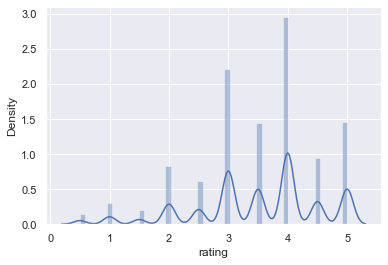

In [6]:

sns.set_style('whitegrid')
sns.set(font_scale = 1)
%matplotlib inline

sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

Mean rating is 3.5 and the 75% quartile is 4, suggesting that users are generous with their rating criteria

In [7]:
movies['genres'].head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

Genres

In [8]:
genres_labels = set()
for genre in movies['genres'].str.split('|').values:
    genres_labels = genres_labels.union(set(genre))
    
def genre_count(dataset, ref_columns, labels):
    keyword_count = dict()
    for genre in labels:
        keyword_count[genre] = 0
    for labels_keywords in dataset[ref_columns].str.split('|'):
        if type(labels_keywords) == float and pd.isnull(labels_keywords):
            continue
        for genre in [genre for genre in labels_keywords if genre in labels]:
            if pd.notnull(genre):
                keyword_count[genre] += 1
    
    keyword_valuecount = []
    for k, v in keyword_count.items():
        keyword_valuecount.append([k, v])
    keyword_valuecount.sort(key = lambda x:x[1], reverse = True)
    return keyword_valuecount, keyword_count

    

In [9]:
#created a list of top 10 genres and valuecount of each genre 
keyword_valuecount, values = genre_count(movies, 'genres', genres_labels)
keyword_valuecount[:10]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779]]

# Content-Based Recommendation System

In [67]:
# Break up the big genre string into a string array - recommends based on genre 
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [66]:
#transforms text to feature vectors as estimators for TFIDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',lowercase = True, ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 177)

In [58]:
'''Cosine Similarity: Determines how vectors are related to each other by measuring the cosine angle between two vectors. The value also ranges from [-1, 1], with -1 meaning that the two vectors are diametrically opposed, 0 meaning the two vectors are perpendicular to one another, and 1 meaning that the vectors are the same. '''

'Cosine Similarity: Determines how vectors are related to each other by measuring the cosine angle between two vectors. The value also ranges from [-1, 1], with -1 meaning that the two vectors are diametrically opposed, 0 meaning the two vectors are perpendicular to one another, and 1 meaning that the vectors are the same.\n\nCosine'

In [ ]:
"Cosine similarity is useful when trying to determine how similar two texts/documents are. Vectors that are parallel are similar, while vectors that are orthogonal are not similar. "

In [39]:
# #calculating dotproduct of the matrix to obtain cosine similiarity score

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31379419, 0.0611029 , 0.05271111],
       [0.31379419, 1.        , 0.        , 0.        ],
       [0.0611029 , 0.        , 1.        , 0.35172407],
       [0.05271111, 0.        , 0.35172407, 1.        ]])

In [35]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [76]:
genre_recommendations('Flint (2017)').head(20)
#pick random user, predict what user wants to watch, look at recent movies, then curate new list of movies of other users within last week

25                                     Othello (1995)
30                             Dangerous Minds (1995)
36                    Cry, the Beloved Country (1995)
39                                 Restoration (1995)
50                                     Georgia (1995)
51                       Home for the Holidays (1995)
55                          Mr. Holland's Opus (1995)
105                   Boys of St. Vincent, The (1992)
120                    Basketball Diaries, The (1995)
121                  Awfully Big Adventure, An (1995)
127          Beauty of the Day (Belle de jour) (1967)
147                                       Kids (1995)
155                                      Nadja (1994)
163                                  Showgirls (1995)
177                         White Man's Burden (1995)
179                      Browning Version, The (1994)
181    Burnt by the Sun (Utomlyonnye solntsem) (1994)
187                                  Cure, The (1995)
199                         

In [73]:
movies

,movieId,title,genres
0,1,Toy Story (1995),"[""['Adventure', 'Animation', 'Children', 'Come..."
1,2,Jumanji (1995),"[""['Adventure', 'Children', 'Fantasy']""]"
2,3,Grumpier Old Men (1995),"[""['Comedy', 'Romance']""]"
3,4,Waiting to Exhale (1995),"[""['Comedy', 'Drama', 'Romance']""]"
4,5,Father of the Bride Part II (1995),"[""['Comedy']""]"
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[""['Action', 'Animation', 'Comedy', 'Fantasy']""]"
9738,193583,No Game No Life: Zero (2017),"[""['Animation', 'Comedy', 'Fantasy']""]"
9739,193585,Flint (2017),"[""['Drama']""]"
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[""['Action', 'Animation']""]"


# EDA

In [37]:
#join the tables together

df_joined= pd.merge(movies, ratings, on='movieId')

In [ ]:
df_joined
df_new = df_joined.drop(['genres', 'title','timestamp'], axis=1)

In [ ]:
from surprise import Reader, Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['movieId', 'userId', 'rating']],reader)
# data = Dataset.load_builtin('ml-100k')

In [ ]:
dataset = data.build_full_trainset()

In [ ]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [ ]:
#need to add more to the grid search later
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

### using KNN


In [ ]:
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)


In [ ]:
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

In [ ]:
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

In [ ]:
svd.predict(2, 4)

In [ ]:
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list      

In [ ]:
df_joined.drop(['userId', 'timestamp','rating'], axis=1)

In [ ]:
user_rating = movie_rater(df_joined, 3, 'Action')

In [ ]:
user_rating

In [ ]:

new_ratings_df = df_new.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)
    

In [ ]:
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [ ]:
list_of_movies = []
for m_id in df_new['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [ ]:
list_of_movies

In [ ]:
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

In [ ]:
ranked_movies

In [ ]:
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
            
recommended_movies(ranked_movies,movies,4)